# 过拟合 与 欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

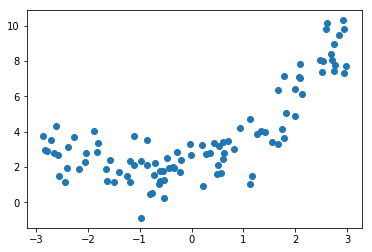

In [2]:
np.random.seed = 666
x = np.random.uniform(-3, 3, size= 100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x + 2 + np.random.normal(0,1, size=100)
plt.scatter(X[:, 0], y)

0.5328184114069463

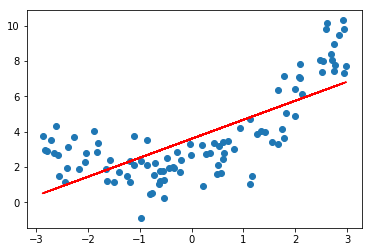

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
plt.scatter(X[:, 0], y)
plt.plot(x, y_predict, color="r")
# score
# 因为添加特征后 线性回归后的维度个数不一致. 那么导致这个score可能不一致
# 但是使用均方误差就不会有这个问题
lin_reg.score(X,y)


# 均方误差

In [4]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predict)


3.078381501192366

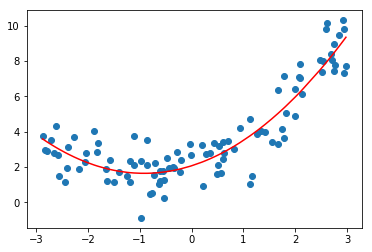

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)
plt.scatter(X[:, 0], y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")

In [6]:
# 多项式
mean_squared_error(y, y_predict)

1.0468003102942756

# 使用更大的多项式

In [12]:
def PolyReg(degree):
    poly_reg = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
    return poly_reg

poly10_reg = PolyReg(degree=10)

In [13]:
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

0.9090066077109603

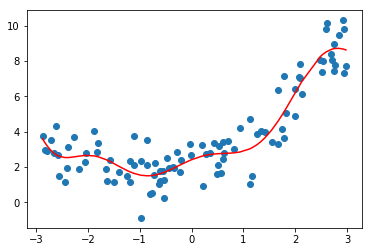

In [14]:
plt.scatter(X[:, 0], y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color="r")

In [15]:
poly100_reg = PolyReg(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.5553418625763552

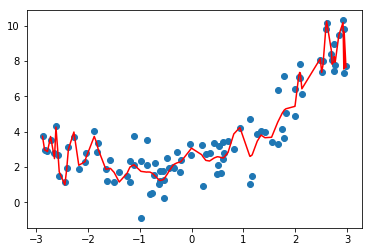

In [16]:
plt.scatter(X[:, 0], y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color="r")

In [17]:
# 可以看到有些地方实际时没有数据的 是因为我们的X并不是连续的

In [18]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)
plt.plot(X_plot[:, 0], y_plot, color="r")

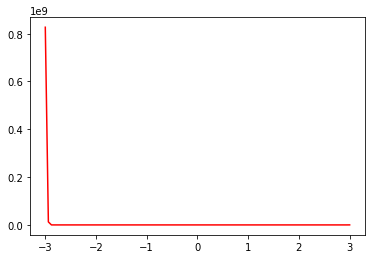

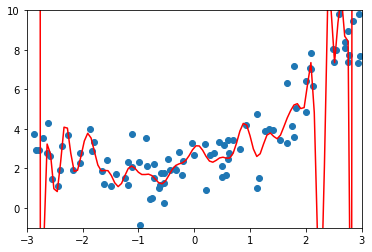

In [22]:
plt.axis([-3, 3, -1, 10])
plt.scatter(X[:, 0], y)
plt.plot(X_plot[:, 0], y_plot, color="r")